## Graph topology

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8, 6.0)
matplotlib.rcParams['savefig.format'] = 'png'

### Connectedness

In [30]:
G=nx.erdos_renyi_graph(50,0.03)

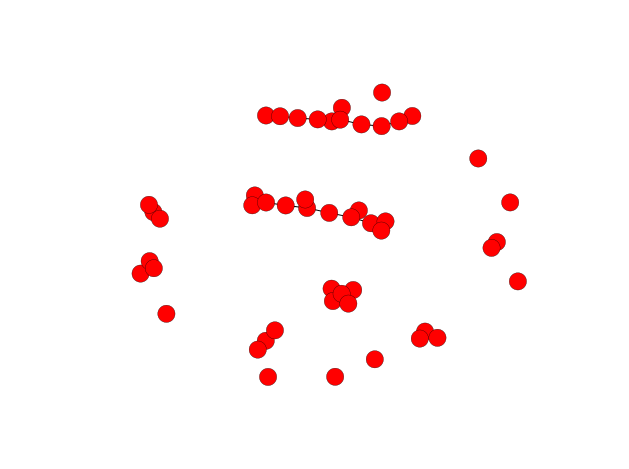

In [31]:
nx.draw(G)

In [32]:
nx.is_connected(G)

False

In [35]:
components=list(nx.connected_components(G))
print(components)

[{0, 41, 27}, {1}, {2, 6, 38, 9, 11, 44, 45, 16, 17, 21, 28, 29}, {3}, {10, 4}, {35, 36, 5, 37, 40, 43, 12, 14, 47, 19, 31}, {23, 8, 42, 13, 7}, {15}, {32, 18, 22}, {20}, {24}, {48, 25, 26}, {33, 30, 39}, {34}, {46}, {49}]


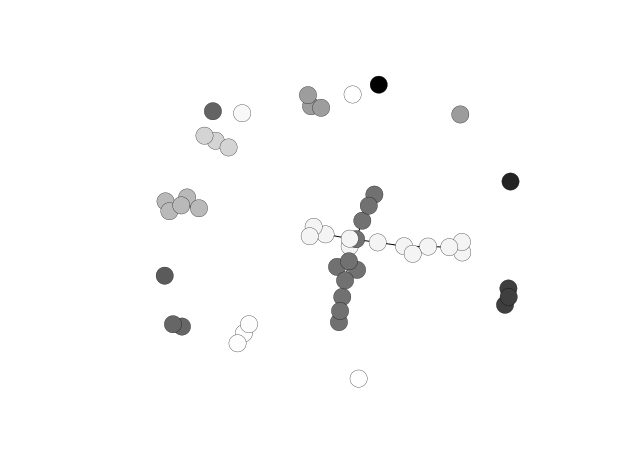

In [36]:
colors=np.random.random(size=len(components))
node_color_dict={}

for idx, nodes in enumerate(components):
    for n in nodes:
        node_color_dict[n]=colors[idx]
    
nx.draw(G, node_color=[node_color_dict[n] for n in G.nodes()], pos=nx.layout.spring_layout(G))

### Degree distribution

In [37]:
huge_graph=nx.read_gpickle("../data/airport/big_airportnet.gpickle")

In [38]:
degs=list(huge_graph.degree().values())

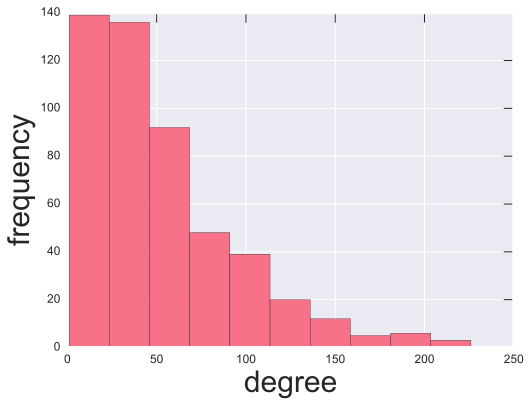

In [39]:
plt.hist(degs)
plt.xlabel("degree", fontsize=30)
plt.ylabel("frequency", fontsize=30)

### Centrality

In [40]:
cents=nx.centrality.betweenness_centrality(huge_graph)

#### Get the centralmost node:

In [41]:
sorted(cents.keys(), key=lambda x:cents[x])[-1]

'FRA'

(array([ 443.,   25.,    8.,    6.,    8.,    1.,    4.,    1.,    1.,    3.]),
 array([ 0.        ,  0.00533981,  0.01067962,  0.01601943,  0.02135924,
         0.02669905,  0.03203886,  0.03737866,  0.04271847,  0.04805828,
         0.05339809]),
 <a list of 10 Patch objects>)

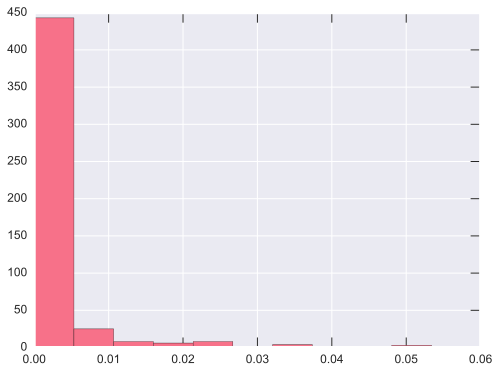

In [42]:
plt.hist(list(cents.values()), bins=10)

Many real world networks tend to have these very few "hubs" with high centrality

### Clustering

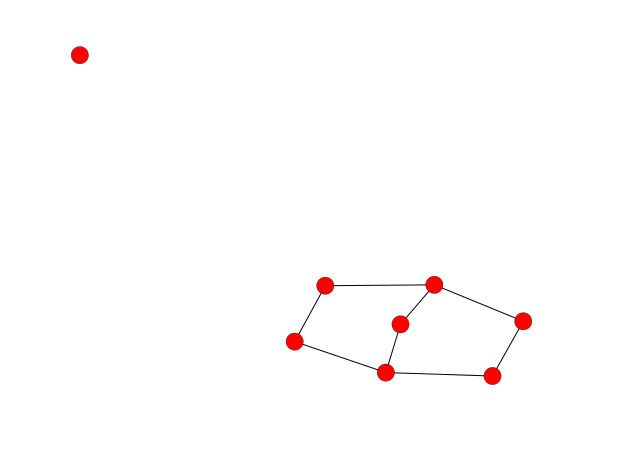

In [43]:
J=nx.erdos_renyi_graph(8,0.4)
nx.draw(J)

In [44]:
nx.clustering(J)

{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}

In [45]:
nx.write_adjlist(J,"toy_graph.edgelist")

##### Now let's see how our scale free network is regarding clustering:

In [46]:
huge_clust=nx.clustering(huge_graph)

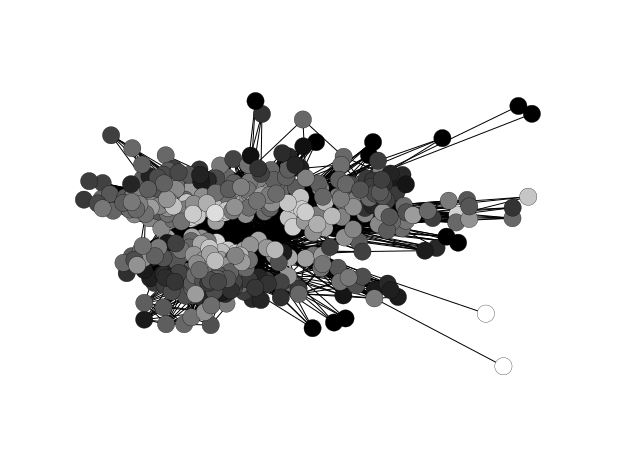

In [47]:
nx.draw(huge_graph, node_color=[huge_clust[n] for n in huge_graph.nodes()], pos=nx.layout.fruchterman_reingold_layout(huge_graph, scale=2.0, iterations=100))

(array([   2.,    0.,   13.,   29.,   50.,   89.,  111.,  101.,   77.,   28.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

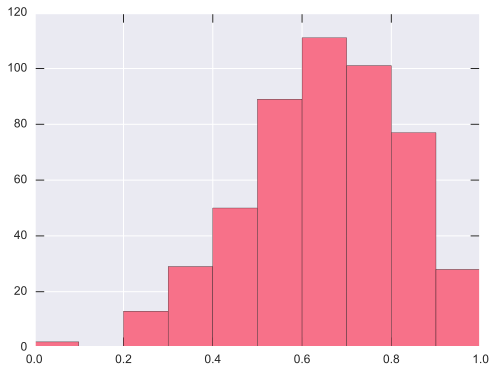

In [48]:
plt.hist(list(huge_clust.values()))

### Average path length

In [49]:
nx.average_shortest_path_length(huge_graph)

2.2686573146292583

#### In many real world networks, shortest pathlengths increase sublinearly with network size:

In [50]:
size_array=range(50,1000,50)
avg_pathlens=[nx.average_shortest_path_length(nx.barabasi_albert_graph(n, 4)) for n in size_array]

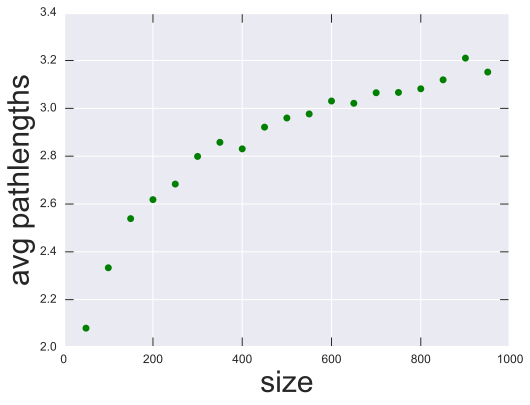

In [51]:
plt.plot(size_array, avg_pathlens, 'go')
plt.xlabel("size", fontsize=30)
plt.ylabel("avg pathlengths", fontsize=30)

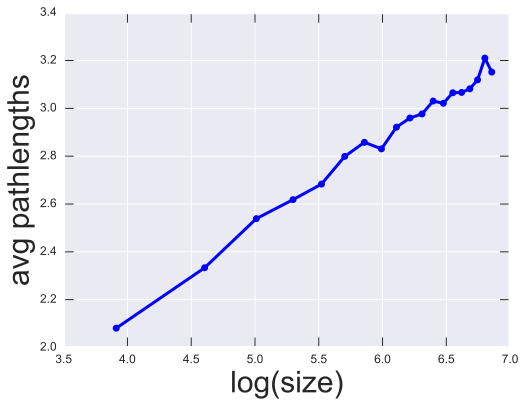

In [52]:
plt.plot(np.log(np.array(size_array)), np.array(avg_pathlens), 'bo-')
plt.xlabel("log(size)", fontsize=30)
plt.ylabel("avg pathlengths", fontsize=30)

### Diameter:

NetworkXError: Graph not connected: infinite path length

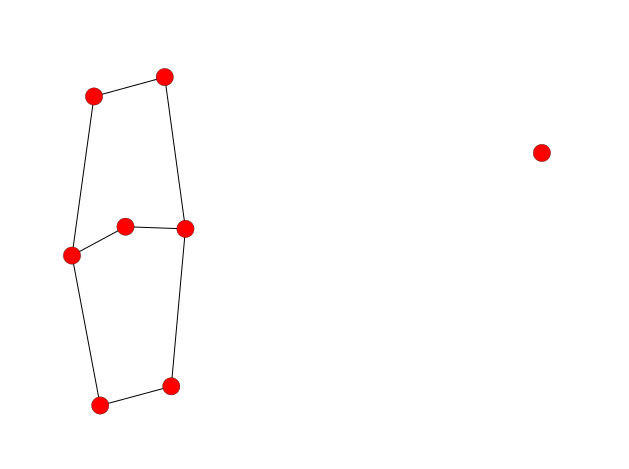

In [53]:
nx.draw(J)
nx.diameter(J)

## Minimum spanning tree

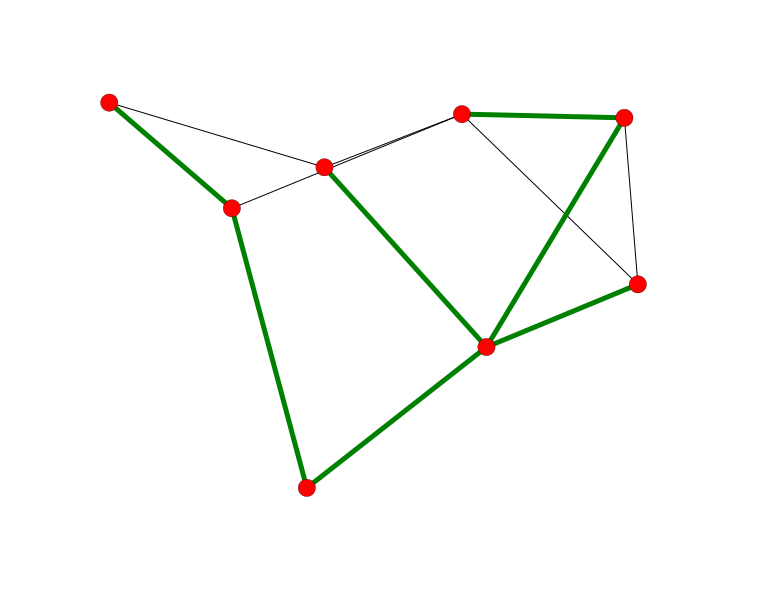

In [28]:
T = nx.minimum_spanning_tree(J)

pos = nx.spring_layout(J)

nx.draw(J, pos = pos)
nx.draw_networkx_edges(T, edge_color='g', pos = pos, width = 5)

# Let's do some exercises!